# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [2]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Google Analytics\\')

## Goal 1

In [10]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Acquisition Overview Goal 1 Indiv Reg  20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG1 = pd.concat(frames)

# Check headers
analyticsG1.head(3)

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,Direct,3667732,0.6016,2206526,0.3444,2.57,00:03:34,0.0151,55491,0
1,Organic Search,2172320,0.3538,768553,0.2986,3.13,00:03:59,0.0060,13091,0
2,Social,1767577,0.5825,1029664,0.5221,1.89,00:02:08,0.0010,1718,0


In [11]:
analyticsG1

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,Direct,3667732,0.6016,2206526,0.3444,2.57,00:03:34,0.0151,55491,0
1,Organic Search,2172320,0.3538,768553,0.2986,3.13,00:03:59,0.0060,13091,0
2,Social,1767577,0.5825,1029664,0.5221,1.89,00:02:08,0.0010,1718,0
3,Other,835994,0.6698,559925,0.5288,1.41,00:00:58,0.0046,3849,0
4,Referral,248949,0.4092,101860,0.3454,2.85,00:03:44,0.0091,2253,0
5,Display,155828,0.7504,116933,0.7624,1.39,00:00:43,0.0002,31,0
6,Paid Search,85724,0.3764,32269,0.4116,2.12,00:02:24,0.0065,553,0
7,Email,32970,0.3091,10191,0.3696,2.60,00:03:20,0.0113,371,0
8,Total,8967094,0.5382,4825921,0.3935,2.45,00:03:05,0.0086,77357,0


## Goal 2

In [12]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Acquisition Overview Goal 2 Start New Team 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG2 = pd.concat(frames)

# Check headers
analyticsG2.head(3)

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Start New Team Member (Goal 2 Conversion Rate),Bike Registrations - Start New Team Member (Goal 2 Completions),Bike Registrations - Start New Team Member (Goal 2 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015130,55491,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.006026,13091,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000972,1718,0


In [13]:
analyticsG2

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Start New Team Member (Goal 2 Conversion Rate),Bike Registrations - Start New Team Member (Goal 2 Completions),Bike Registrations - Start New Team Member (Goal 2 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015130,55491,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.006026,13091,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000972,1718,0
3,Other,835994,0.669772,559925,0.528774,1.411316,57.728920,0.004604,3849,0
4,Referral,248949,0.409160,101860,0.345360,2.848266,224.497242,0.009050,2253,0
5,Display,155828,0.750398,116933,0.762385,1.388768,43.320456,0.000199,31,0
6,Paid Search,85724,0.376429,32269,0.411565,2.117598,143.877397,0.006451,553,0
7,Email,32970,0.309099,10191,0.369609,2.601001,200.056536,0.011253,371,0
8,Total,8967094,0.538181,4825921,0.393527,2.446346,185.073055,0.008627,77357,0


## Goal 3

In [14]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Acquisition Overview Goal 3 Join Team 20160401-20171214 (1).xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG3 = pd.concat(frames)

# Check headers
analyticsG3.head(3)

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join a Team (Goal 3 Conversion Rate),Bike Registration - Join a Team (Goal 3 Completions),Bike Registration - Join a Team (Goal 3 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015070,55274,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.005966,12959,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000967,1709,0


In [15]:
analyticsG3

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join a Team (Goal 3 Conversion Rate),Bike Registration - Join a Team (Goal 3 Completions),Bike Registration - Join a Team (Goal 3 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015070,55274,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.005966,12959,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000967,1709,0
3,Other,835994,0.669772,559925,0.528774,1.411316,57.728920,0.004578,3827,0
4,Referral,248949,0.409160,101860,0.345360,2.848266,224.497242,0.008958,2230,0
5,Display,155828,0.750398,116933,0.762385,1.388768,43.320456,0.000199,31,0
6,Paid Search,85724,0.376429,32269,0.411565,2.117598,143.877397,0.006381,547,0
7,Email,32970,0.309099,10191,0.369609,2.601001,200.056536,0.011253,371,0
8,Total,8967094,0.538181,4825921,0.393527,2.446346,185.073055,0.008581,76948,0


## Goal 4

In [16]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Acquisition Overview Goal 4 Join from Team Page 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG4 = pd.concat(frames)

# Check headers
analyticsG4.head(3)

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join Team from Team Page (Goal 4 Conversion Rate),Bike Registration - Join Team from Team Page (Goal 4 Completions),Bike Registration - Join Team from Team Page (Goal 4 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015070,55274,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.005966,12959,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000967,1709,0


In [17]:
analyticsG4

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join Team from Team Page (Goal 4 Conversion Rate),Bike Registration - Join Team from Team Page (Goal 4 Completions),Bike Registration - Join Team from Team Page (Goal 4 Value)
0,Direct,3667732,0.601605,2206526,0.344366,2.568489,214.016096,0.015070,55274,0
1,Organic Search,2172320,0.353794,768553,0.298567,3.127838,238.646492,0.005966,12959,0
2,Social,1767577,0.582529,1029664,0.522111,1.894573,128.066674,0.000967,1709,0
3,Other,835994,0.669772,559925,0.528774,1.411316,57.728920,0.004578,3827,0
4,Referral,248949,0.409160,101860,0.345360,2.848266,224.497242,0.008958,2230,0
5,Display,155828,0.750398,116933,0.762385,1.388768,43.320456,0.000199,31,0
6,Paid Search,85724,0.376429,32269,0.411565,2.117598,143.877397,0.006381,547,0
7,Email,32970,0.309099,10191,0.369609,2.601001,200.056536,0.011253,371,0
8,Total,8967094,0.538181,4825921,0.393527,2.446346,185.073055,0.008581,76948,0


## Locations

In [18]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Location 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsLoc = pd.concat(frames)

# Check headers
analyticsLoc.head(3)

analyticsLoc

,Region,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,Texas,1539017,0.480720,739837,0.371443,2.536194,193.566748,0.010357,15940,0
1,California,764019,0.570418,435810,0.452630,2.213495,167.230007,0.006666,5093,0
2,New York,594162,0.577799,343306,0.394397,2.408143,182.202207,0.010007,5946,0
3,Pennsylvania,576836,0.505719,291717,0.374691,2.573936,200.361777,0.009656,5570,0
4,Minnesota,440328,0.487232,214542,0.319646,2.575837,203.198781,0.008873,3907,0
5,Illinois,405891,0.545011,221215,0.382287,2.317972,175.127480,0.006433,2611,0
6,New Jersey,386352,0.525705,203107,0.367010,2.572600,199.152894,0.009393,3629,0
7,Massachusetts,353577,0.517129,182845,0.343436,2.526030,200.073130,0.008360,2956,0
8,North Carolina,334796,0.531359,177897,0.427547,2.442039,185.747933,0.008626,2888,0
9,Florida,309568,0.525083,162549,0.387744,2.546723,193.328729,0.009726,3011,0


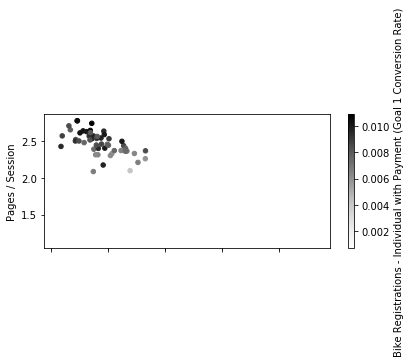

In [41]:
analyticsLoc.plot.scatter(x='Bounce Rate', y='Pages / Session', c='Bike Registrations - Individual with Payment (Goal 1 Conversion Rate)')
plt.tight_layout()


In [19]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Location City 20160401 - 20171214 (1).xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsCity = pd.concat(frames)

# Check headers
analyticsCity.head(3)

analyticsCity

,City,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,Houston,676095,0.442084,298891,0.358960,2.616335,204.141618,0.012000,8113,0
1,New York,427789,0.579863,248059,0.396471,2.370989,180.114486,0.010889,4658,0
2,Chicago,241418,0.543369,131179,0.417869,2.151563,157.901905,0.005000,1207,0
3,Dallas,165549,0.537406,88967,0.420921,2.111441,140.405747,0.005020,831,0
4,Philadelphia,154252,0.536868,82813,0.434840,2.300152,166.330155,0.008635,1332,0
5,Minneapolis,133430,0.484411,64635,0.351150,2.416833,185.598816,0.007202,961,0
6,(not set),131393,0.698066,91721,0.542776,2.025618,130.239290,0.007497,985,0
7,Los Angeles,125204,0.588927,73736,0.503267,2.004289,137.001334,0.004513,565,0
8,San Francisco,120391,0.574354,69147,0.452849,2.095098,155.637722,0.006645,800,0
9,Denver,116160,0.511527,59419,0.357257,2.446255,190.063309,0.008695,1010,0


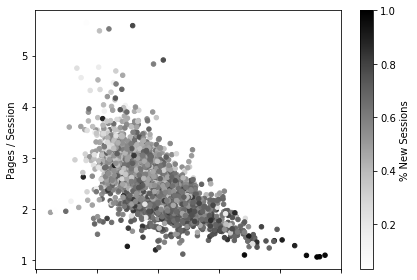

In [39]:
analyticsCity.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()


In [20]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Location Metro 20160401-20171214 (2).xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsCity2 = pd.concat(frames)

# Check headers
analyticsCity2.head(3)

analyticsCity2

,Metro,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,Houston TX,879908,0.449630,395633,0.356405,2.635465,206.281727,0.012140,10682,0
1,New York NY,734284,0.567997,417071,0.384312,2.452208,187.255761,0.010413,7646,0
2,Philadelphia PA,634934,0.508719,323003,0.380545,2.542535,198.787304,0.009146,5807,0
3,Minneapolis-St. Paul MN,414118,0.485079,200880,0.318982,2.579617,203.721067,0.008981,3719,0
4,Chicago IL,369451,0.544608,201206,0.384560,2.291449,172.531610,0.006261,2313,0
5,Boston MA-Manchester NH,357996,0.514388,184149,0.343638,2.527995,201.702111,0.008394,3005,0
6,Dallas-Ft. Worth TX,328332,0.525407,172508,0.367381,2.380237,170.595403,0.007124,2339,0
7,Los Angeles CA,320929,0.558519,179245,0.458238,2.252006,169.514341,0.006522,2093,0
8,Denver CO,279505,0.504438,140993,0.340259,2.527053,200.509916,0.009535,2665,0
9,San Francisco-Oakland-San Jose CA,277801,0.581071,161422,0.423782,2.210384,170.021339,0.007477,2077,0


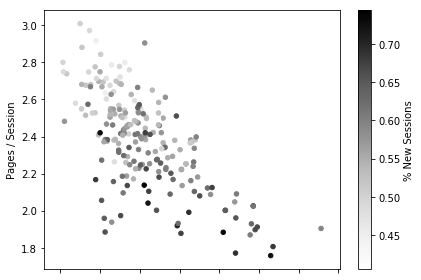

In [38]:
analyticsCity2.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()

## Referrals

In [21]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Referral Traffic Goal 1 Indiv Reg 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG1Ref = pd.concat(frames)

# Check headers
analyticsG1Ref.head(3)

analyticsG1Ref

,Source,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Individual with Payment (Goal 1 Conversion Rate),Bike Registrations - Individual with Payment (Goal 1 Completions),Bike Registrations - Individual with Payment (Goal 1 Value)
0,m.facebook.com,871059,0.644046,561002,0.551314,1.721278,96.998308,0.000186,162,0
1,facebook.com,404395,0.348884,141087,0.304729,2.567472,241.003155,0.002864,1158,0
2,l.facebook.com,110350,0.499375,55106,0.393856,2.293756,187.870757,0.002673,295,0
3,lm.facebook.com,72932,0.492157,35894,0.620414,1.510352,94.147110,0.000206,15,0
4,t.co,55915,0.766574,42863,0.807941,1.326728,42.765144,0.000286,16,0
5,outlook.live.com,35335,0.367313,12979,0.320787,2.828753,271.312664,0.015905,562,0
6,l.instagram.com,26355,0.623828,16441,0.745286,1.503472,84.007095,0.000152,4,0
7,bfapps1.boundlessfundraising.com,7123,0.023586,168,0.321775,2.416257,241.836445,0.009547,68,0
8,duckduckgo.com,6355,0.365696,2324,0.311251,3.040598,242.935012,0.002990,19,0
9,linkedin.com,5729,0.489091,2802,0.435853,2.083261,152.004887,0.001920,11,0


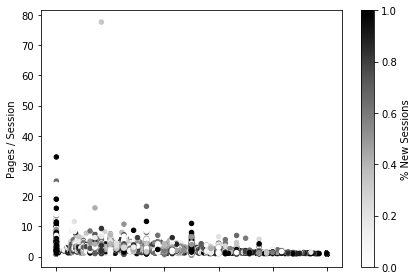

In [37]:
analyticsG1Ref.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()


In [22]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Referral Traffic Goal 2 Start New Team 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG2Ref = pd.concat(frames)

# Check headers
analyticsG2Ref.head(3)

analyticsG2Ref

,Source,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registrations - Start New Team Member (Goal 2 Conversion Rate),Bike Registrations - Start New Team Member (Goal 2 Completions),Bike Registrations - Start New Team Member (Goal 2 Value)
0,m.facebook.com,871059,0.644046,561002,0.551314,1.721278,96.998308,0.000186,162,0
1,facebook.com,404395,0.348884,141087,0.304729,2.567472,241.003155,0.002864,1158,0
2,l.facebook.com,110350,0.499375,55106,0.393856,2.293756,187.870757,0.002673,295,0
3,lm.facebook.com,72932,0.492157,35894,0.620414,1.510352,94.147110,0.000206,15,0
4,t.co,55915,0.766574,42863,0.807941,1.326728,42.765144,0.000286,16,0
5,outlook.live.com,35335,0.367313,12979,0.320787,2.828753,271.312664,0.015905,562,0
6,l.instagram.com,26355,0.623828,16441,0.745286,1.503472,84.007095,0.000152,4,0
7,bfapps1.boundlessfundraising.com,7123,0.023586,168,0.321775,2.416257,241.836445,0.009547,68,0
8,duckduckgo.com,6355,0.365696,2324,0.311251,3.040598,242.935012,0.002990,19,0
9,linkedin.com,5729,0.489091,2802,0.435853,2.083261,152.004887,0.001920,11,0


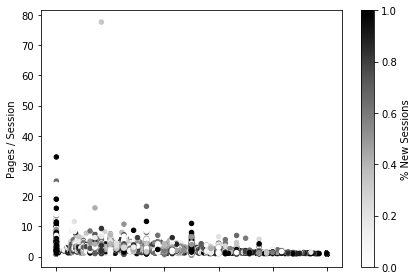

In [36]:
analyticsG2Ref.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()


In [23]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Referral Traffic Goal 3 Join Team 20160401-20171214 (2).xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG3Ref = pd.concat(frames)

# Check headers
analyticsG3Ref.head(3)

analyticsG3Ref

,Source,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join a Team (Goal 3 Conversion Rate),Bike Registration - Join a Team (Goal 3 Completions),Bike Registration - Join a Team (Goal 3 Value)
0,m.facebook.com,871059,0.644046,561002,0.551314,1.721278,96.998308,0.000185,161,0
1,facebook.com,404395,0.348884,141087,0.304729,2.567472,241.003155,0.002849,1152,0
2,l.facebook.com,110350,0.499375,55106,0.393856,2.293756,187.870757,0.002655,293,0
3,lm.facebook.com,72932,0.492157,35894,0.620414,1.510352,94.147110,0.000206,15,0
4,t.co,55915,0.766574,42863,0.807941,1.326728,42.765144,0.000286,16,0
5,outlook.live.com,35335,0.367313,12979,0.320787,2.828753,271.312664,0.015905,562,0
6,l.instagram.com,26355,0.623828,16441,0.745286,1.503472,84.007095,0.000152,4,0
7,bfapps1.boundlessfundraising.com,7123,0.023586,168,0.321775,2.416257,241.836445,0.009125,65,0
8,duckduckgo.com,6355,0.365696,2324,0.311251,3.040598,242.935012,0.002990,19,0
9,linkedin.com,5729,0.489091,2802,0.435853,2.083261,152.004887,0.001920,11,0


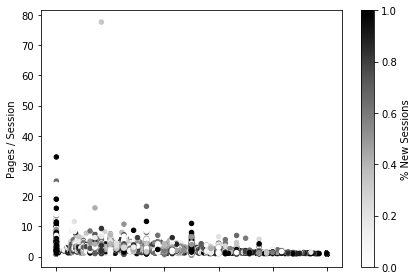

In [35]:
analyticsG3Ref.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()


In [28]:
# filenames
excel_names = ["Analytics Bike MS - Luminate Pages Referral Traffic Goal 4 Join from Team Page 20160401-20171214.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
analyticsG4Ref = pd.concat(frames)

# Check headers
analyticsG4Ref.head(3)

analyticsG4Ref



,Source,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Bike Registration - Join Team from Team Page (Goal 4 Conversion Rate),Bike Registration - Join Team from Team Page (Goal 4 Completions),Bike Registration - Join Team from Team Page (Goal 4 Value)
0,m.facebook.com,871059,0.644046,561002,0.551314,1.721278,96.998308,0.000185,161,0
1,facebook.com,404395,0.348884,141087,0.304729,2.567472,241.003155,0.002849,1152,0
2,l.facebook.com,110350,0.499375,55106,0.393856,2.293756,187.870757,0.002655,293,0
3,lm.facebook.com,72932,0.492157,35894,0.620414,1.510352,94.147110,0.000206,15,0
4,t.co,55915,0.766574,42863,0.807941,1.326728,42.765144,0.000286,16,0
5,outlook.live.com,35335,0.367313,12979,0.320787,2.828753,271.312664,0.015905,562,0
6,l.instagram.com,26355,0.623828,16441,0.745286,1.503472,84.007095,0.000152,4,0
7,bfapps1.boundlessfundraising.com,7123,0.023586,168,0.321775,2.416257,241.836445,0.009125,65,0
8,duckduckgo.com,6355,0.365696,2324,0.311251,3.040598,242.935012,0.002990,19,0
9,linkedin.com,5729,0.489091,2802,0.435853,2.083261,152.004887,0.001920,11,0


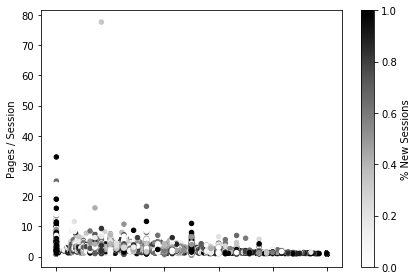

In [34]:
analyticsG4Ref.plot.scatter(x='Bounce Rate', y='Pages / Session', c='% New Sessions')
plt.tight_layout()


# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics